In [1]:
import numpy as np
from tqdm.notebook import tqdm
from random import choice, random
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

<img src="sarsa.PNG">

<img src="Qlearning.PNG">

In [2]:
class Cliff:
    def __init__(self):
        self.Q = defaultdict(lambda: np.zeros(4))
        self.start = (3,0)
        self.goal = (3, 11)
        self.rewards = self.rewards_init()
        
        
    def rewards_init(self):
        
        rewards = np.zeros((4, 12))
        rewards[...] = -1
        rewards[-1, 1:-1] = -100
        rewards[self.goal] = 0
        
        return rewards

    def action(self, s, e):
        
        if random() < e:
            a = choice([0, 1, 2, 3])
        else:
            a = np.argmax(self.Q[s])
        
        return a

    def reward(self, s_next):
        
        return self.rewards[s_next]

    def state(self, s, a):

        if a == 0: # up
             s_next = (s[0]-1, s[1])
        elif a == 1: # down
             s_next = (s[0]+1, s[1])
        elif a == 2: # right 
             s_next = (s[0], s[1]+1)
        elif a == 3: # left
             s_next = (s[0], s[1]-1)

        if (s_next[0] > 3 or s_next[1] > 11 or s_next[0] < 0 or s_next[1] < 0):
            return s
        else:
            return s_next
    
    def SARSA(self, r, s, s_next, a, a_next, alpha):

        self.Q[s][a] = self.Q[s][a] + alpha*(r + self.Q[s_next][a_next] - self.Q[s][a])

        return self.Q

    def Qlearning(self, r, s, s_next, a, y, alpha):

        self.Q[s][a] = self.Q[s][a] + alpha*(r + y*max(self.Q[s_next])-self.Q[s][a])

        return self.Q

In [3]:
Qlearning = Cliff()
SARSA = Cliff()
alpha = 0.5
y = 1
e = 0.1

In [4]:
Qrewards = []
for _ in tqdm(range(10000)):
    state = Qlearning.start
    reward = 0
    r_sum = 0
    while state != Qlearning.goal and reward != -100:
        action = Qlearning.action(state, e)
        s_next = Qlearning.state(state, action)
        reward = Qlearning.reward(s_next)
        Q = Qlearning.Qlearning(reward, state, s_next, action, y, alpha)
        state = s_next
        r_sum += reward
    Qrewards.append(r_sum)

In [5]:
Srewards = []
for i in tqdm(range(10000)):
    if i // 100 == 0:
        e = e/2
    state = SARSA.start
    reward = 0
    action = SARSA.action(state, e)
    r_sum = 0
    while state != SARSA.goal and reward != -100:
        s_next = SARSA.state(state, action)
        a_next = SARSA.action(s_next, e)
        reward = SARSA.reward(s_next)
        Q = SARSA.SARSA(reward, state, s_next, action, a_next, alpha)
        state = s_next
        action = a_next
        r_sum += reward
    Srewards.append(r_sum)

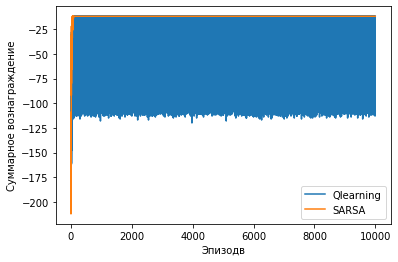

In [6]:
t = np.arange(0, len(Srewards))
fig, ax = plt.subplots()
ax.set_xlabel('Эпизодв')
ax.set_ylabel('Суммарное вознаграждение')
line1, = ax.plot(t, Qrewards, label='Qlearning')

line2, = ax.plot(t, Srewards, label='SARSA')

ax.legend()
plt.show()

In [7]:
Qpolicy = dict((k,np.argmax(v)) for k, v in Qlearning.Q.items())
Spolicy = dict((k,np.argmax(v)) for k, v in SARSA.Q.items())

In [9]:
drow_q = np.zeros((4,12))
for state, action in dict(Qpolicy).items():
    drow_q[state[0], state[1]] = action
drow_q = drow_q[::-1]

drow_s = np.zeros((4,12))
for state, action in dict(Spolicy).items():
    drow_s[state[0], state[1]] = action
drow_s = drow_s[::-1]

Text(0.5, 1.0, 'Qlearning')

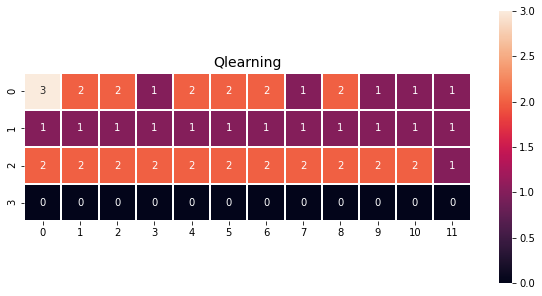

In [10]:
_, axes = plt.subplots(figsize=(10, 5))
fig = sns.heatmap(np.flipud(drow_q), annot= True, square = True, linewidths = 0.1)
fig.set_title('Qlearning', fontsize=14)

Text(0.5, 1.0, 'SARSA')

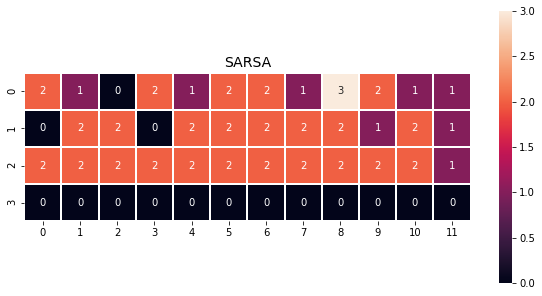

In [11]:
_, axes = plt.subplots(figsize=(10, 5))
fig = sns.heatmap(np.flipud(drow_s), annot=True, square = True, linewidths = 0.1)
fig.set_title('SARSA', fontsize=14)

 {0: 'up', 1: 'down', 2: 'right', 3: 'left'}